#Paquetes necesarios

In [3]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen desde archivo y convierte a RGB

(512, 512, 3)


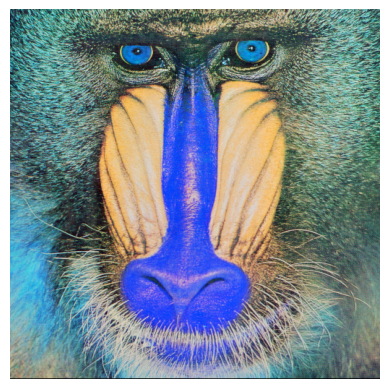

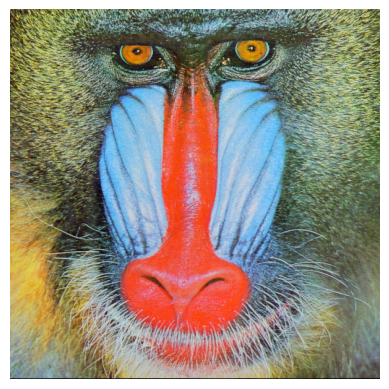

In [4]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 
#Muestra dimensiones
print(img.shape)
#Mostramos la original
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(img) 
plt.show()

#OpenCV lee las imágenes almacenando en formato BGR, por lo que convertimos para visualizr de forma correcta a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Muestra la imagen tras convertir a RGB
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

Convierte a grises para procesar

(512, 512)


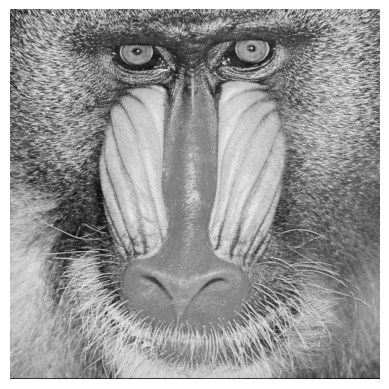

In [5]:
#Conversión a grises de la original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gris.shape)
#Muestra, indicando el mapa de color de grises
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()


Canny, detector de bordes multietapa. Tratado en el tema 4

[[  0 255   0 ...   0 255   0]
 [255 255   0 ...   0   0 255]
 [  0   0 255 ... 255 255   0]
 ...
 [  0   0   0 ...   0   0 255]
 [  0 255 255 ... 255 255 255]
 [255   0   0 ...   0   0   0]]


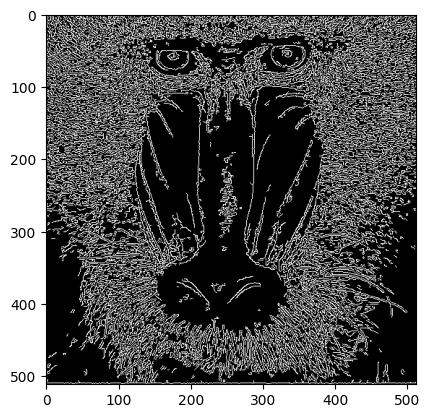

In [6]:
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)
print(canny)
#Muestra resultado
plt.imshow(canny, cmap='gray') 
plt.show()


Definida la imagen de salida de Canny, salida 0 o 255, obtiene el número de píxeles no nulos por columna y visualiza

(0.0, 512.0)

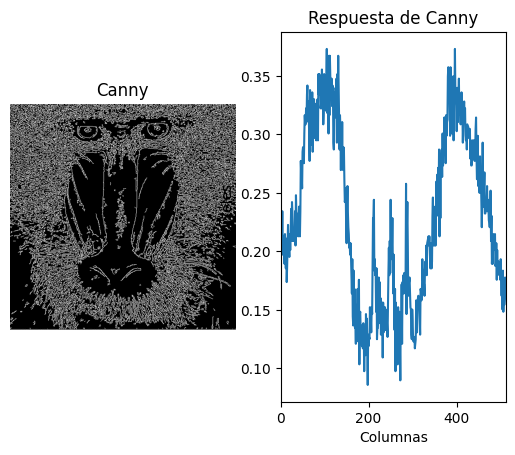

In [7]:
#Si muestras el contenido de la imagen resultado, son valores 0 o 255
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

TAREA: Realiza la cuenta de píxeles blancos por filas, determina el máximo para filas y columnas (uno para cada) y muestra el número de valores que superan en cada caso 0.95*máximo.

Número de filas por encima del umbral: 1
Número de columnas por encima del umbral: 8


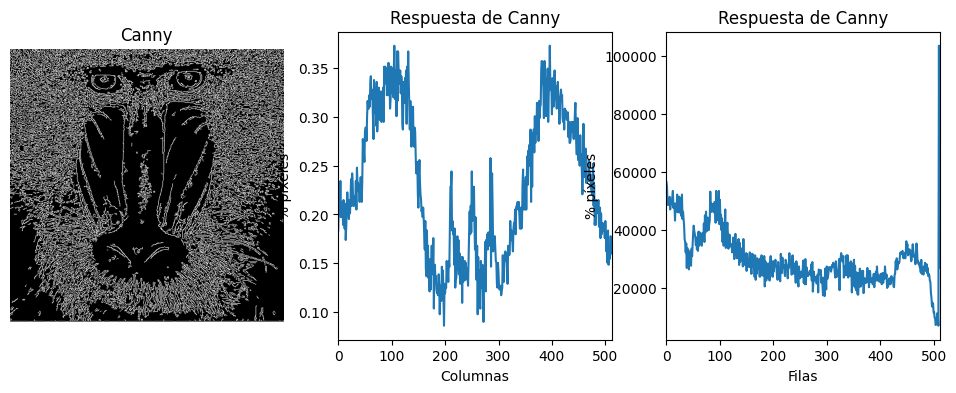

In [8]:

# Lee la imagen de archivo
img = cv2.imread('mandril.jpg') 

# Convierte la imagen a escala de grises
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)

# Calcula la suma de píxeles blancos por fila y por columna
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Encuentra el máximo valor para filas y columnas
max_row = np.max(row_counts)
max_col = np.max(col_counts)

# Calcula el umbral para filas y columnas (95% del máximo)
threshold_row = 0.95 * max_row
threshold_col = 0.95 * max_col

# Cuenta cuántos valores superan el umbral en filas y columnas
num_rows_above_threshold = np.sum(row_counts > threshold_row)
num_cols_above_threshold = np.sum(col_counts > threshold_col)

# Muestra los resultados
print(f"Número de filas por encima del umbral: {num_rows_above_threshold}")
print(f"Número de columnas por encima del umbral: {num_cols_above_threshold}")

# Muestra las imágenes y gráficos como en tu código original
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 3, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
plt.xlim([0, canny.shape[0]])

plt.subplot(1, 3, 3)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(row_counts)
plt.xlim([0, canny.shape[1]])

plt.show()


Sobel. Cuando hay un borde, el valor de intensidad de los píxeles cercanos cambia de forma notable, calcular las derivadas proporciona una evidencia de dicho cambio. El operador de Sobel aproximar el cálculo de la derivada aplicando un kernel de tamaño impar basado en el patrón [1 2 1]

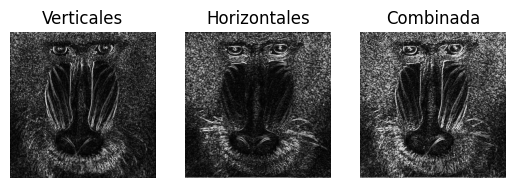

In [9]:
# Gaussiana para suavizar la imagen original
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Combinada')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
#plt.imshow(sobel, cmap='gray') #Sin convertir escala
plt.show()

TAREA: Elige otra imagen, muestra el contenido de alguna de las imágenes resultado de Sobel antes y después de ajustar la escala

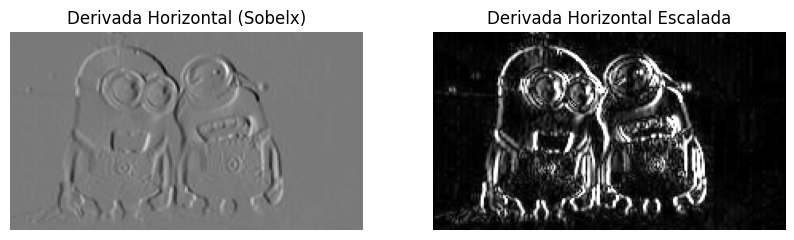

In [10]:
# Lee una nueva imagen (reemplaza 'nueva_imagen.jpg' con la ruta de tu imagen)
nueva_imagen = cv2.imread('minions.jpeg') 

# Convierte la imagen a escala de grises
gris_nueva_imagen = cv2.cvtColor(nueva_imagen, cv2.COLOR_BGR2GRAY)

# Aplica el operador de Sobel para obtener las derivadas en las direcciones horizontal y vertical
sobelx_nueva_imagen = cv2.Sobel(gris_nueva_imagen, cv2.CV_64F, 1, 0)  # Derivada en dirección horizontal (x)
sobely_nueva_imagen = cv2.Sobel(gris_nueva_imagen, cv2.CV_64F, 0, 1)  # Derivada en dirección vertical (y)

# Muestra una de las imágenes de derivadas de Sobel antes de ajustar la escala
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.axis("off")
plt.title('Derivada Horizontal (Sobelx)')
plt.imshow(sobelx_nueva_imagen, cmap='gray')

# Ajusta la escala de la imagen de derivada de Sobel antes de mostrarla
scaled_sobelx = cv2.convertScaleAbs(sobelx_nueva_imagen)

plt.subplot(1, 2, 2)
plt.axis("off")
plt.title('Derivada Horizontal Escalada')
plt.imshow(scaled_sobelx, cmap='gray')

plt.show()

Umbralizado de una imagen

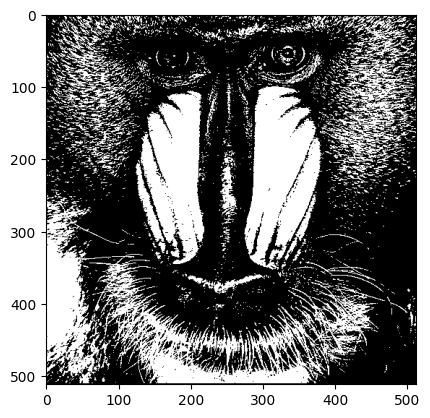

In [11]:
#Define valor umbral
valorUmbral = 150 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(gris, valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()

El histograma de una imagen aporta información sobre el valor de umbral a elegir para ciertas situaciones

(0.0, 256.0)

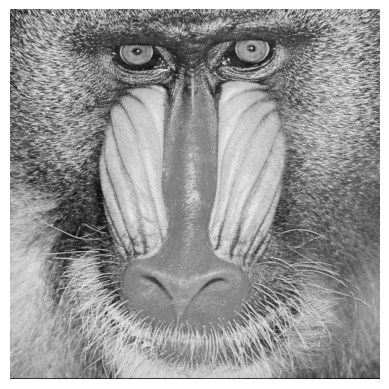

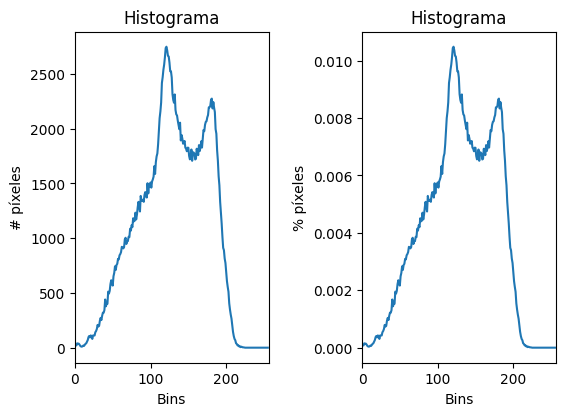

In [12]:
#Cálculo del histograma de una imagen en escala de grises
hist = cv2.calcHist([gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

#Normaliza el histograma en base al número de píxeles y lo muestra
hist /= hist.sum()

plt.subplot(1, 2, 2)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("% píxeles")
plt.tight_layout(pad=3.0) #separación entre plots
plt.plot(hist)
plt.xlim([0, 256])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

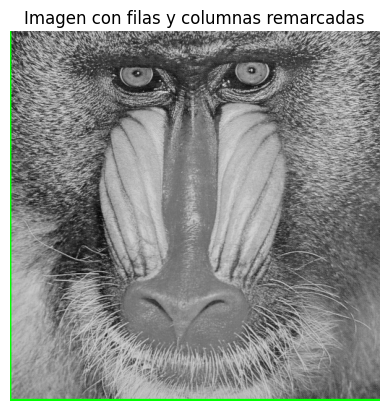

In [13]:
# Aplicar el operador Sobel a la imagen original
sobelx = cv2.Sobel(gris, cv2.CV_64F, 1, 0)  # Derivada en dirección horizontal (x)
sobely = cv2.Sobel(gris, cv2.CV_64F, 0, 1)  # Derivada en dirección vertical (y)

# Convertir la imagen de derivadas de Sobel a 8 bits (rango de valores 0 a 255)
sobel8 = np.uint8(np.sqrt(sobelx**2 + sobely**2))

# Aplicar umbralizado a la imagen de Sobel
umbral_sobel = 100  # Puedes ajustar este valor
_, imagen_umbral_sobel = cv2.threshold(sobel8, umbral_sobel, 255, cv2.THRESH_BINARY)

# Calcular el conteo de píxeles blancos por filas y columnas
row_counts = cv2.reduce(imagen_umbral_sobel, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
col_counts = cv2.reduce(imagen_umbral_sobel, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Calcular los máximos por filas y columnas
max_row = np.max(row_counts)
max_col = np.max(col_counts)

# Calcular el umbral para filas y columnas (0.95 del máximo)
threshold_row = 0.95 * max_row
threshold_col = 0.95 * max_col

# Determinar las filas y columnas por encima del umbral
rows_above_threshold = np.where(row_counts > threshold_row)[0]
cols_above_threshold = np.where(col_counts > threshold_col)[0]

# Remarcar las filas y columnas sobre la imagen original
imagen_remarcada = cv2.cvtColor(gris, cv2.COLOR_GRAY2BGR)

for row in rows_above_threshold:
    cv2.line(imagen_remarcada, (0, row), (imagen_remarcada.shape[1], row), (0, 255, 0), 2)

for col in cols_above_threshold:
    cv2.line(imagen_remarcada, (col, 0), (col, imagen_remarcada.shape[0]), (0, 255, 0), 2)

# Mostrar la imagen original con las filas y columnas remarcadas
plt.imshow(cv2.cvtColor(imagen_remarcada, cv2.COLOR_BGR2RGB))
plt.title("Imagen con filas y columnas remarcadas")
plt.axis("off")
plt.show()


Diferencia de imágenes

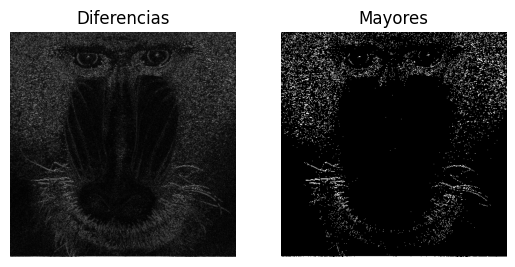

In [14]:
#Calcula la diferencia entre dos imágenes
#Utiliza la imagen original y la obtenida tras aplicar la gaussiana
dif = cv2.absdiff(gris, ggris)

#Visualiza
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Diferencias")
plt.axis("off")
plt.imshow(dif, cmap='gray') 

#Zonas de mayor diferencia tras aplicar umbral
res, imgdif = cv2.threshold(dif, 30, 255, cv2.THRESH_BINARY)
#Visualiza
plt.subplot(1, 2, 2)
plt.title("Mayores")
plt.axis("off")
plt.imshow(imgdif, cmap='gray') 
plt.show()


Webcam y sustracción de fotogramas

In [17]:
vid = cv2.VideoCapture(0)

#Marca de inicio
disponible = 0 
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        if disponible > 0:
            dif = cv2.absdiff(frame, pframe)        
            # Muestra resultado
            cv2.imshow('Diferencia', dif)        

        else:
            disponible = 1

        #Copia fotograma actual para la diferencia en el siguiente forograma
        pframe = frame.copy()
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

KeyboardInterrupt: 

Webcam y sustracción de modelo del fondo

In [18]:
vid = cv2.VideoCapture(0)


# Fondo
# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)
  


while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem=cv2.flip(frame, 1)

        
        #Con un segundo parámerto se puede definir máscara con zonas a actualizar
        objetos = eliminadorFondo.apply(framem)
        #objetos = eliminadorFondo.apply(framem, objetos, 0)  #No actualiza el fondo
        # Obtiene fondo
        background = eliminadorFondo.getBackgroundImage()

        # Muestra resultado
        cv2.imshow('Fotograma', objetos)
        # Muestra fondo
        cv2.imshow('Fondo', background)
  
   
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 


TAREA: Asumiendo que quieren mostrar a personas que no forman parte del curso de VC el comportamiento de una o varias funcioens de las vistas hasta este momento aplicadas sobre la entrada de la webcam. ¿Cuál(es) escogerían?

Para mostrar a personas que no forman parte del curso de Visión por Computadora (VC) el comportamiento de una o varias funciones de las vistas hasta este momento aplicadas sobre la entrada de la webcam, es recomendable seleccionar aquellas funciones que sean visualmente interesantes y fácilmente comprensibles para un público general.

Umbralización de Diferencia: La aplicación de umbralización a la diferencia entre dos fotogramas consecutivos de la cámara puede ser visualmente intrigante. Puedes destacar las áreas en las que se detecta movimiento significativo y mostrar cómo el umbral afecta la detección de cambios en la imagen.

Sustracción de Fondo: Mostrar cómo se realiza la sustracción de fondo en tiempo real puede ser interesante. Puedes explicar cómo esta técnica se utiliza para aislar objetos en movimiento y eliminar el fondo estático.

Operador de Sobel: Mostrar el resultado de aplicar el operador de Sobel a la imagen de la cámara puede ser útil para resaltar los bordes y contornos de los objetos en la escena.

Detección de Contornos (Canny): Mostrar cómo se aplican operaciones de detección de bordes, como el operador Canny, para resaltar los bordes de los objetos en tiempo real.

Histograma: Mostrar cómo se calcula y normaliza el histograma de una imagen en escala de grises en tiempo real. Esto puede ayudar a explicar cómo se distribuyen los niveles de intensidad en la imagen.


TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) propongan (los componentes de cada grupo) una reinterpretación del procesamiento de imágenes con las técnicas vistas o que conozcan.

Realidad Aumentada Interactiva: Puedes crear una aplicación de realidad aumentada que permita a los usuarios interactuar con objetos virtuales superpuestos en el mundo real. Utiliza técnicas de seguimiento de objetos y reconocimiento de patrones para detectar y seguir objetos en tiempo real, y luego superponer elementos gráficos o información adicional en función de la posición y el movimiento de los objetos detectados.

Manipulación de Voz y Sonido en Tiempo Real: Siguiendo la idea de "Messa di voce," podrías desarrollar una aplicación que permita a los usuarios manipular su voz en tiempo real de maneras creativas. Esto podría incluir efectos de sonido en tiempo real, cambios en el tono de voz, o incluso la creación de música mediante la modulación de la voz.

Control de Música o Juegos con Gestos: Inspirado en "Virtual air guitar," puedes desarrollar una aplicación que permita a los usuarios controlar la reproducción de música o juegos mediante gestos y movimientos del cuerpo. Utiliza técnicas de seguimiento de gestos para detectar y reconocer los movimientos del usuario y traducirlos en comandos para la música o el juego.

Filtros de Realidad Aumentada para Privacidad: Siguiendo la idea de "My little piece of privacy," podrías crear una aplicación que permita a las personas aplicar filtros de privacidad en tiempo real a las imágenes y videos que capturan. Esto podría incluir difuminar caras o información sensible automáticamente mientras se graba o se transmite en vivo.

Pintura o Dibujo en el Aire: Desarrolla una aplicación que permita a los usuarios pintar o dibujar en el aire utilizando gestos y movimientos de las manos. Esto podría ser una forma creativa de crear arte digital en tiempo real utilizando técnicas de seguimiento de manos.

Visualización de Datos en el Mundo Real: Crea una aplicación que permita a los usuarios visualizar datos o información relevante en el mundo real utilizando realidad aumentada. Por ejemplo, podrías superponer datos meteorológicos, información de tráfico o datos de redes sociales en tiempo real sobre la vista de la cámara del usuario.





